In [27]:
# Importações 

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import mannwhitneyu


from src.config import CLEANED_DATA_FILEPATH

In [28]:
# Obtendo os dados como DataFrame
df = pd.read_parquet(CLEANED_DATA_FILEPATH)
df.head()

,rotulo,FOS_FOS_Mean,FOS_FOS_Variance,FOS_FOS_Median,FOS_FOS_Mode,FOS_FOS_Skewness,FOS_FOS_Kurtosis,FOS_FOS_Energy,FOS_FOS_Entropy,FOS_FOS_MinimalGrayLevel,...,tex_laplacian_std,tex_entropia,tex_suavidade,tex_uniformidade,meta_tamanho_bytes,meta_tamanho_kb,comp_variancia_blocos,comp_media_blocos,comp_energia_dct,comp_coef_dc
0,manipulado,22.745659,310.826241,non_zero,non_zero,6.975735,65.992026,0.494363,1.140282,non_zero,...,22.076431,1.139742,0.996780,0.490508,35319,34.491211,9.247067,2.752584,3.950087e+08,15697.0950
1,manipulado,2.852302,423.482420,zero,zero,8.327513,76.341420,0.951592,0.259459,zero,...,31.562840,0.262360,0.997635,0.944172,27936,27.281250,13.897900,3.541544,2.063520e+08,1968.4136
2,manipulado,54.046034,3412.467306,zero,zero,0.262052,1.433904,0.287129,2.386470,zero,...,29.688532,2.381062,0.999706,0.284890,128698,125.681641,15.709027,4.631431,3.022698e+09,37297.9180
3,manipulado,2.624307,372.246170,zero,zero,8.687468,85.000807,0.954012,0.248639,zero,...,29.970658,0.251582,0.997310,0.946573,27264,26.625000,13.599282,3.397348,1.812600e+08,1811.0712
4,manipulado,54.129428,3414.554278,zero,zero,0.261521,1.438942,0.286137,2.394278,zero,...,30.345632,2.388839,0.999706,0.283906,128864,125.843750,16.027229,4.811873,3.027993e+09,37355.4730


In [29]:
# Resumo da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   rotulo                                        194 non-null    object 
 1   FOS_FOS_Mean                                  194 non-null    float64
 2   FOS_FOS_Variance                              194 non-null    float64
 3   FOS_FOS_Median                                194 non-null    object 
 4   FOS_FOS_Mode                                  194 non-null    object 
 5   FOS_FOS_Skewness                              194 non-null    float64
 6   FOS_FOS_Kurtosis                              194 non-null    float64
 7   FOS_FOS_Energy                                194 non-null    float64
 8   FOS_FOS_Entropy                               194 non-null    float64
 9   FOS_FOS_MinimalGrayLevel                      194 non-null    obj

In [30]:
# Definindo as colunas por natureza

numeric_columns = df.columns.sort_values()[df.nunique().sort_index() > 10].to_list()

categoric_columns = df.columns.difference(numeric_columns).to_list()

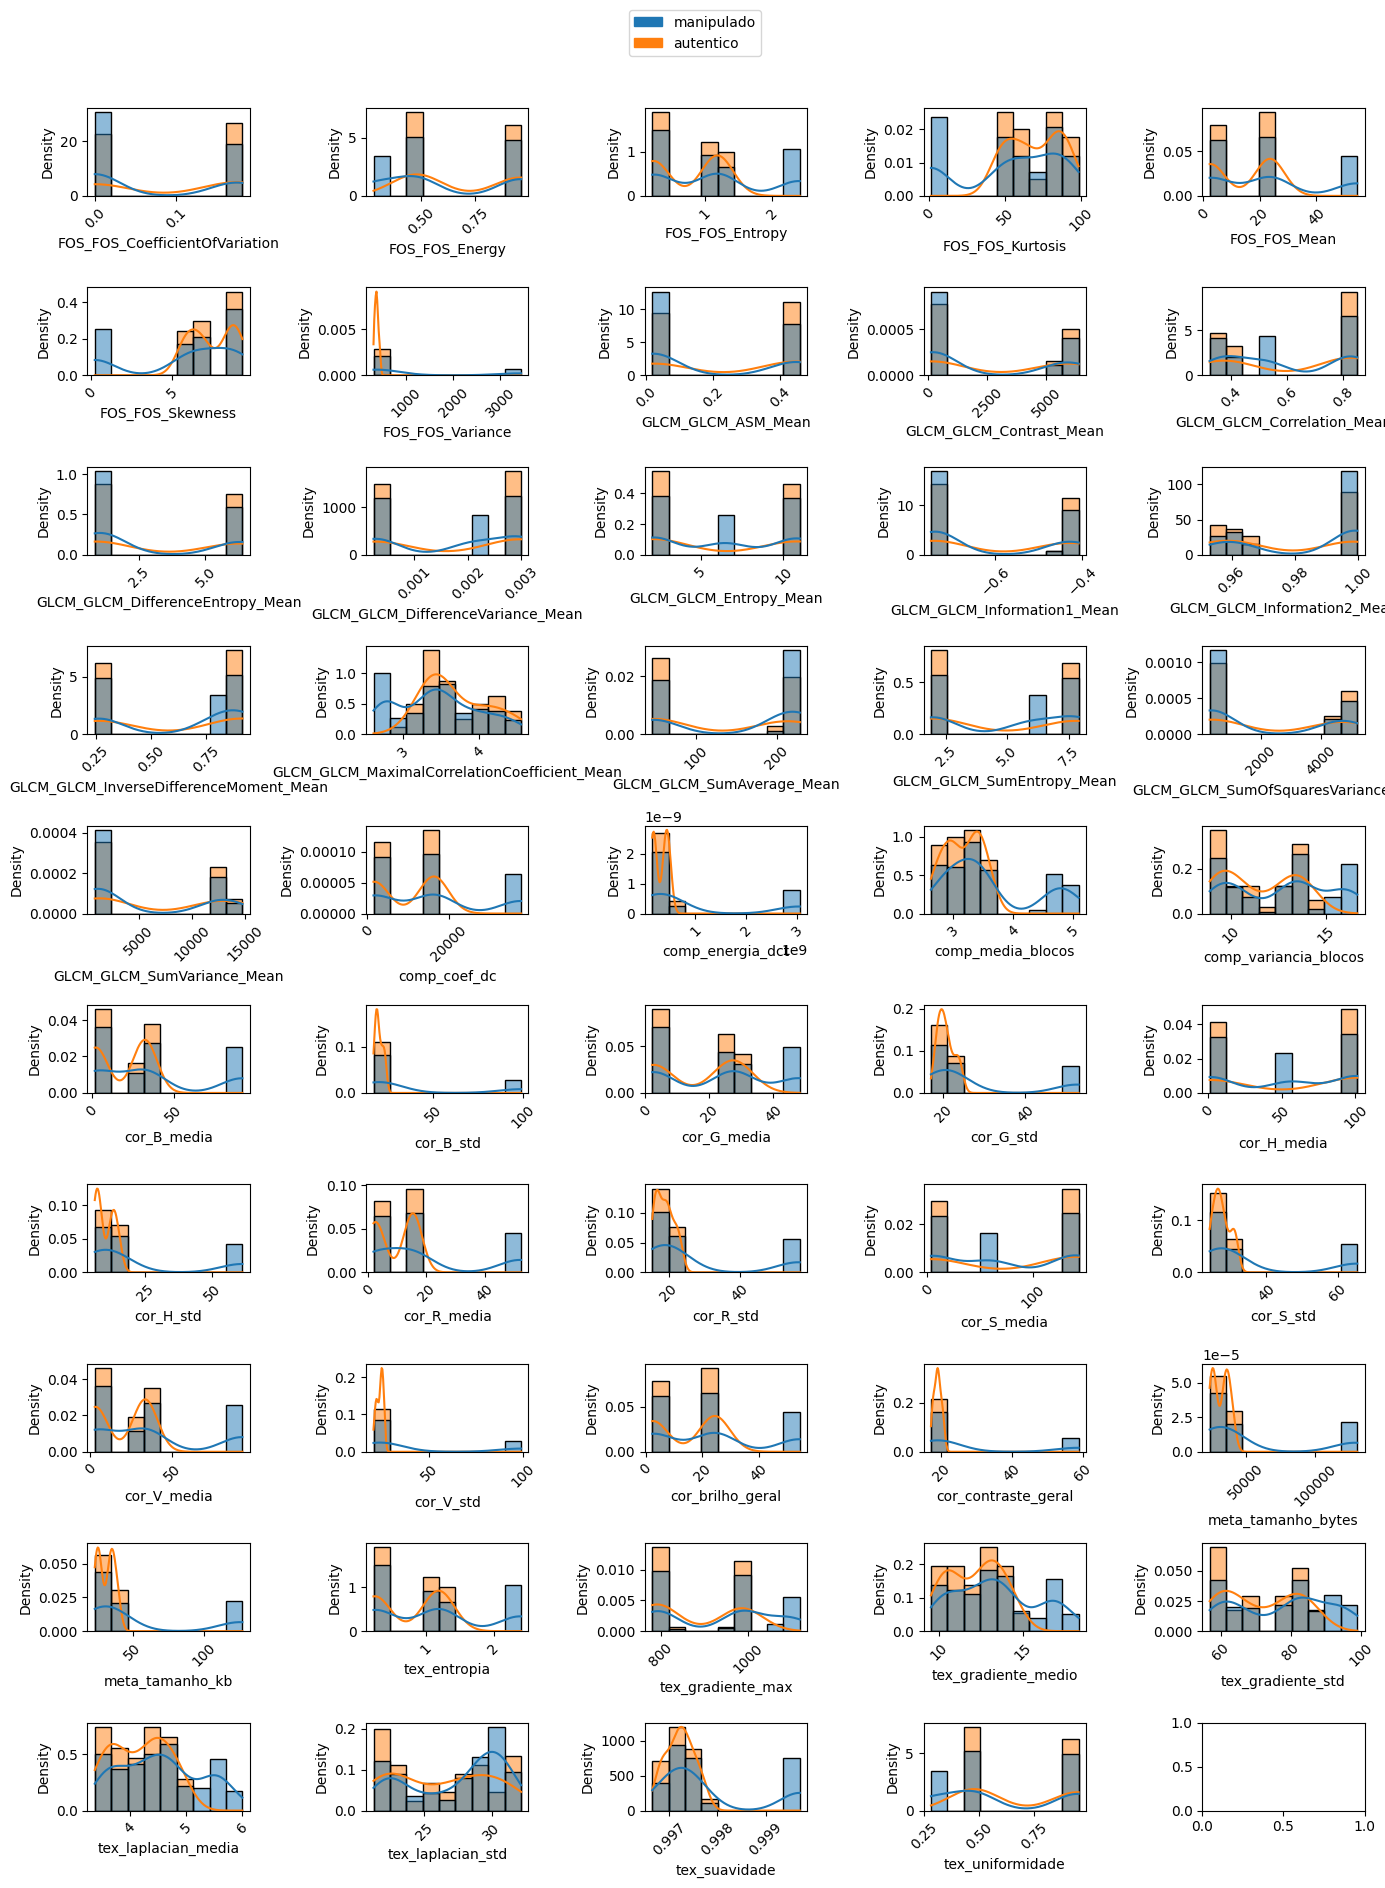

In [31]:
# Histogramas das colunas numéricas para cada rotulo

import matplotlib.patches as mpatches

fig, axs = plt.subplots(10, 5, figsize=(14, 18))

labels = sorted(df["rotulo"].unique(), reverse=True)
palette = sns.color_palette(n_colors=len(labels))

for ax, column in zip(axs.flatten(), numeric_columns):

    sns.histplot(
        df,
        x=column,
        hue="rotulo",
        bins="sturges",
        stat="density",
        kde=True,
        common_norm=False,
        ax=ax,
    )


    ax.tick_params(axis='x', rotation=45)

    ax.get_legend().remove()

# cria patches coloridos para legenda (um por rótulo)
handles = [mpatches.Patch(color=palette[i], label=labels[i]) for i in range(len(labels))]

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()

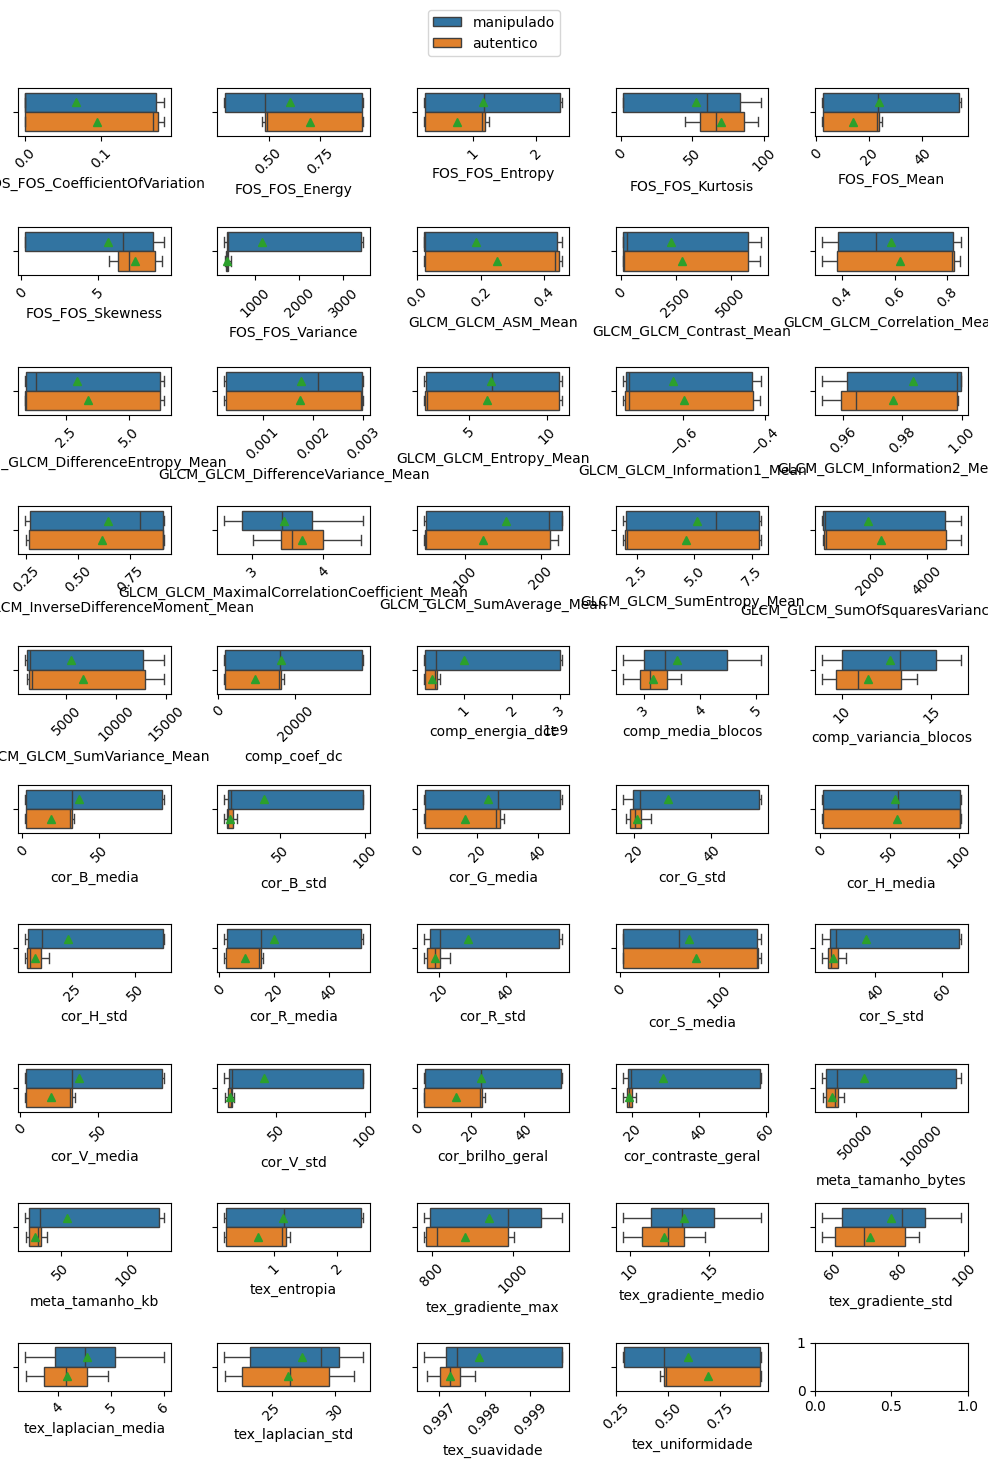

In [32]:
# Boxplots das colunas numéricas para cada rotulo

fig, axs = plt.subplots(10, 5, figsize=(10, 14))

for ax, column in zip(axs.flatten(), numeric_columns):

    sns.boxplot(
        data=df,
        x=column,
        hue="rotulo",
        showmeans=True,
        ax=ax,
    )

    ax.tick_params(axis='x', rotation=45)

    handles, labels = ax.get_legend_handles_labels()

    ax.get_legend().remove()

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()

Algumas colunas apresentam outliers que poderiam ser ruidos. Porém, como a quantidade de ocorrências desses outliers é alta, e nós temos poucos registros da classe minoritária, não iremos removê-los da base.

In [33]:
len(categoric_columns)

14

In [34]:
df.groupby("rotulo")["FOS_FOS_10Percentile"].value_counts(normalize="column").rename("proportion").reset_index()

,rotulo,FOS_FOS_10Percentile,proportion
0,autentico,non_zero,0.540541
1,autentico,zero,0.459459
2,manipulado,zero,0.617834
3,manipulado,non_zero,0.382166


In [35]:
# Proporção de cada valor das colunas categóricas para cada rotulo

for ax, column in zip(axs.flatten(), categoric_columns):

    print(column)
    display(pd.crosstab(
            index=df["rotulo"],
            columns=df[column],
            normalize="index"
    ))

FOS_FOS_10Percentile


FOS_FOS_10Percentile,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


FOS_FOS_25Percentile


FOS_FOS_25Percentile,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


FOS_FOS_75Percentile


FOS_FOS_75Percentile,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.636943,0.363057


FOS_FOS_90Percentile


FOS_FOS_90Percentile,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.636943,0.363057


FOS_FOS_HistogramWidth


FOS_FOS_HistogramWidth,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.636943,0.363057


FOS_FOS_Median


FOS_FOS_Median,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


FOS_FOS_MinimalGrayLevel


FOS_FOS_MinimalGrayLevel,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


FOS_FOS_Mode


FOS_FOS_Mode,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


cor_B_mediana


cor_B_mediana,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


cor_B_min


cor_B_min,non_zero,zero
rotulo,,
autentico,0.513514,0.486486
manipulado,0.363057,0.636943


cor_G_mediana


cor_G_mediana,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


cor_G_min


cor_G_min,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


cor_R_mediana


cor_R_mediana,non_zero,zero
rotulo,,
autentico,0.540541,0.459459
manipulado,0.382166,0.617834


rotulo


rotulo,autentico,manipulado
rotulo,,
autentico,1.0,0.0
manipulado,0.0,1.0


In [36]:
# Teste de hipótese de mannwhitney

mw_analysis = {}

for column in numeric_columns:

    manipulado_group = df[df["rotulo"] == "manipulado"][column]
    autentico_group = df[df["rotulo"] == "autentico"][column]

    statistic_mw, pvalue_mw = mannwhitneyu(manipulado_group, autentico_group)

    mw_analysis[column] = {
        "statistic": statistic_mw,
        "pvalue": pvalue_mw,
        "valid_null_hyphotesis": pvalue_mw > 0.01,
    }

df_mw = pd.DataFrame(mw_analysis).T
df_mw[df_mw["valid_null_hyphotesis"]]

,statistic,pvalue,valid_null_hyphotesis
FOS_FOS_CoefficientOfVariation,2429.5,0.083661,True
FOS_FOS_Energy,2173.0,0.017348,True
FOS_FOS_Entropy,3636.0,0.017348,True
FOS_FOS_Kurtosis,2199.0,0.021755,True
FOS_FOS_Mean,3621.0,0.019784,True
FOS_FOS_Skewness,2198.0,0.021569,True
GLCM_GLCM_Contrast_Mean,3048.0,0.64162,True
GLCM_GLCM_Correlation_Mean,2789.0,0.708181,True
GLCM_GLCM_DifferenceEntropy_Mean,3039.0,0.662734,True
GLCM_GLCM_DifferenceVariance_Mean,2833.0,0.817245,True


Com um nível de significância de 99%, as colunas acima não possuiram evidências para rejeitar a hipótese nula de que as medianas das amostras de cada classe são iguais.

Como miramos colunas que permitam diferenciar as classes, ou seja, apresentam faixas de valores diferentes para cada classe, vamos remover essas colunas.

In [37]:
# Removendo as colunas que não rejeitaram a hipótese nula do teste de mw

equal_classes_columns = df_mw[df_mw["valid_null_hyphotesis"]].index

df = df.drop(equal_classes_columns, axis=1)
df.shape

(194, 29)

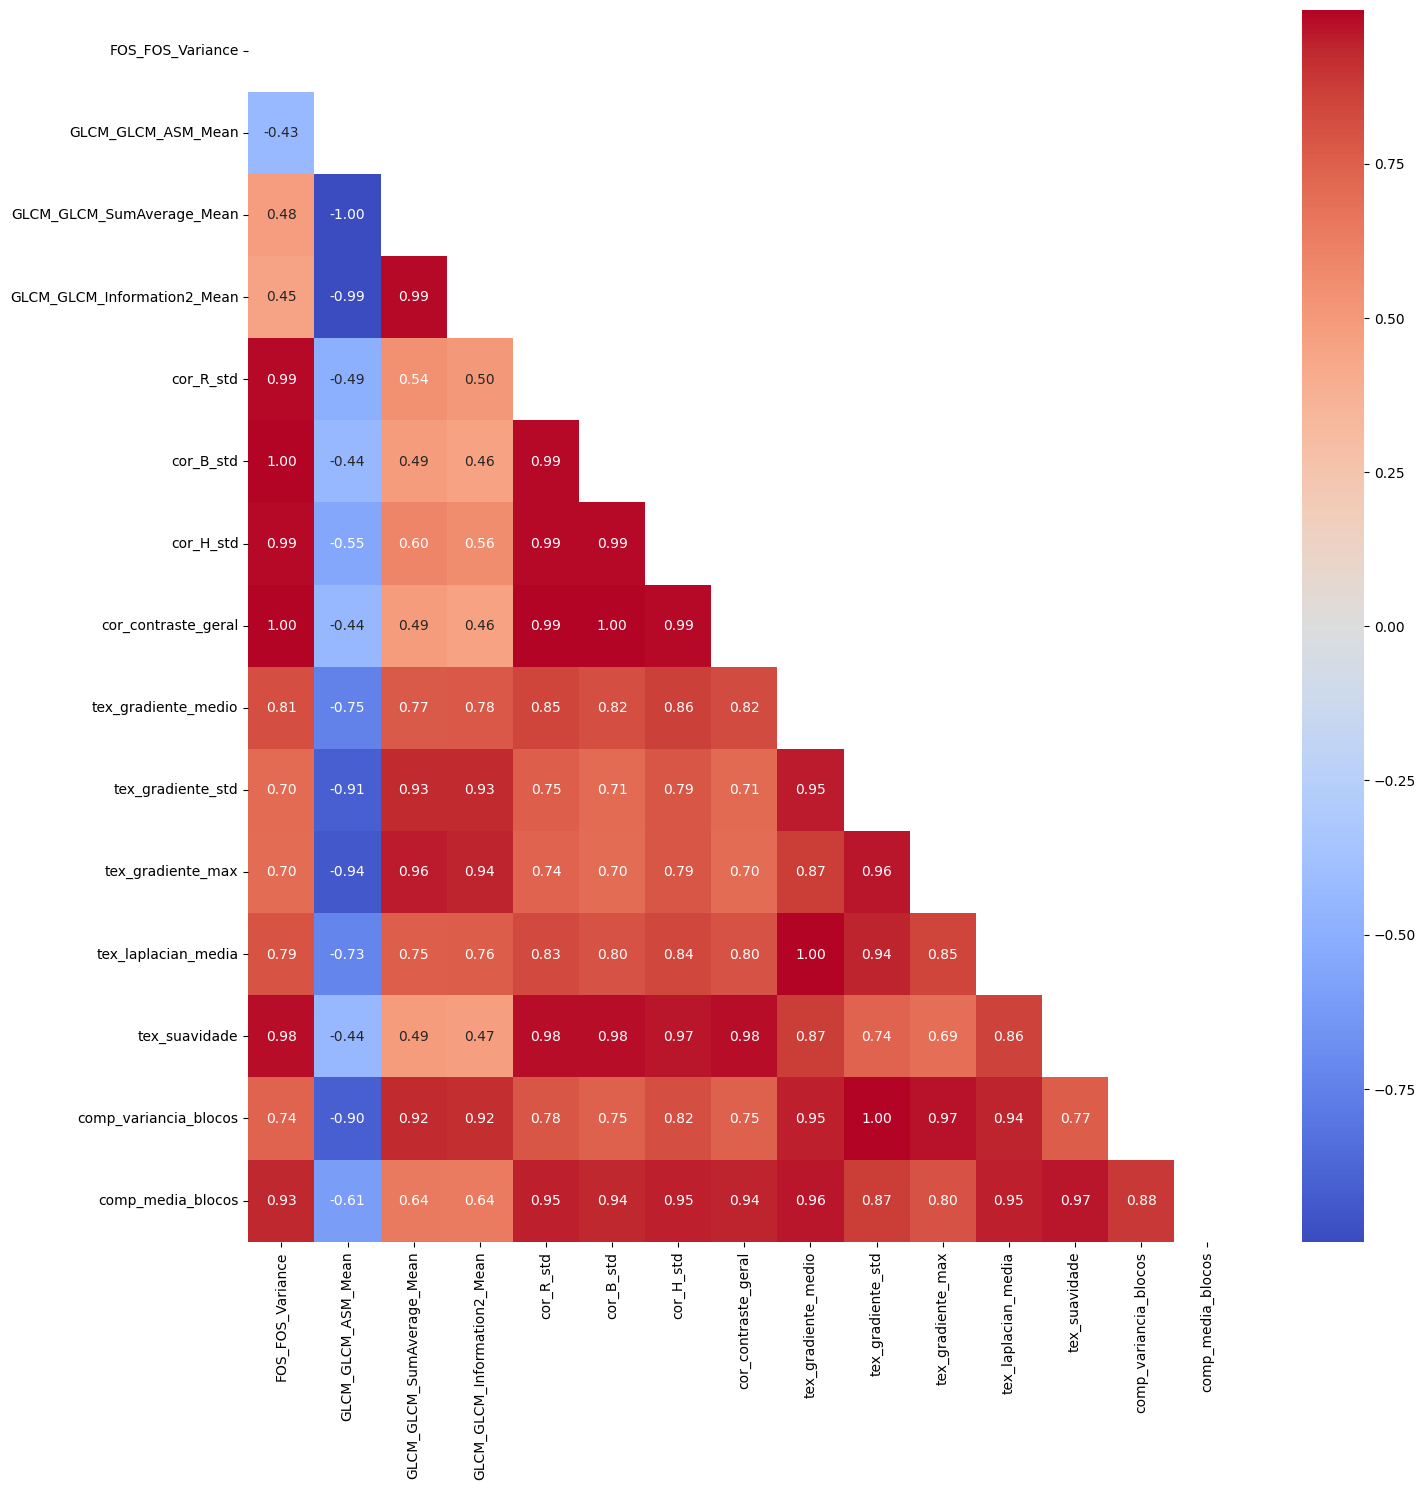

In [40]:
# Matriz de correlação

fig, ax = plt.subplots(figsize=(16, 16))

df_corr = df.select_dtypes("number").corr()

mask = np.triu(df_corr)

sns.heatmap(
    df_corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    ax=ax
)

plt.show()

As correlações de pearson são fortes, no geral, entre as colunas numéricas. Como nós temos muitas colunas, seria interessante remover algumas delas.

Uma das colunas correlacionadas quase perfeitamente ou perfeitamente (0.98, 0.99 ou 1.0) pode ser removida, visto que ambas fornecem a mesma informação para o algoritmo de aprendizado de máquina.

In [43]:
# Removendo algumas colunas altamente correlacionadas com outras

remove_columns = [
    "cor_B_std", 
    "cor_R_std",
    "cor_H_std",
    "cor_contraste_geral",
    "tex_gradiente_medio",
    "GLCM_GLCM_Information2_Mean",
    "GLCM_GLCM_SumAverage_Mean",
    ]

df = df.drop(remove_columns, axis=1)
df.shape

(194, 22)

In [44]:
# Salvando as modificações
df.to_parquet(CLEANED_DATA_FILEPATH, index=False)